In [2]:
%matplotlib inline
import os

import torch
import numpy as np
import matplotlib.pyplot as plt

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import transforms, models

from torchsummary import summary

device = torch.device('cuda:1')

In [3]:
# fileid: 12XWUcct4LA_bZXaccScYUBC97S9R90L1
# filename: crop_part1.tar.gz
!wget --load-cookies ~/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies ~/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=12XWUcct4LA_bZXaccScYUBC97S9R90L1' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=12XWUcct4LA_bZXaccScYUBC97S9R90L1" -O crop_part1.tar.gz && rm -rf ~/cookies.txt
!tar -zxvf crop_part1.tar.gz

--2022-06-14 02:57:28--  https://docs.google.com/uc?export=download&confirm=t&id=12XWUcct4LA_bZXaccScYUBC97S9R90L1
Resolving docs.google.com (docs.google.com)... 216.58.220.142, 2404:6800:4004:813::200e
Connecting to docs.google.com (docs.google.com)|216.58.220.142|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-1k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/i46icsocbmf63emr3bmbd3308ivl7agc/1655175375000/16525786242263481678/*/12XWUcct4LA_bZXaccScYUBC97S9R90L1?e=download [following]
--2022-06-14 02:57:28--  https://doc-14-1k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/i46icsocbmf63emr3bmbd3308ivl7agc/1655175375000/16525786242263481678/*/12XWUcct4LA_bZXaccScYUBC97S9R90L1?e=download
Resolving doc-14-1k-docs.googleusercontent.com (doc-14-1k-docs.googleusercontent.com)... 142.250.199.97, 2404:6800:4004:823::2001
Connecting to doc-14-1k-docs.googleusercontent.com (doc-14-1k-docs.goo

In [14]:
tmp = os.listdir('./crop_part1')
print(len(tmp))
print(tmp[0])

9781
25_1_3_20170104222459455.jpg.chip.jpg


In [15]:
fname = '1_1_0_20161219204750596.jpg.chip.jpg'
splits = fname.split('_')
print(splits)

['1', '1', '0', '20161219204750596.jpg.chip.jpg']


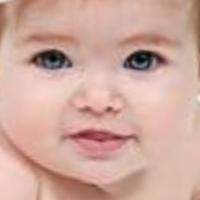

In [17]:
img = Image.open(
    './crop_part1/1_1_0_20161219204750596.jpg.chip.jpg').convert('RGB')
img

In [18]:
transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

class FaceDataset(Dataset):
    def __init__(self, root_dir, transform):
        # implement this.
        # 필요한 정보들 생성.
        # Hint: os.listdir(directory) -> List[filename]
        
    def __len__(self):
        # implement this.
        # 데이터 셋의 크기가 얼마인지? (또는, image가 몇장 있는지)
        return 
        
    def __getitem__(self, idx):
        # implement this
        # 인덱스 (idx)를 받아서, 해당 idx 의 data 와 label 을 반환.
        # Hint: Image.open(filename).convert('RGB')
        # Hint: '1' -> 1. 로 바꾸기 위해선 float() 을 사용.
        # Hint: filename = {age}_{gender}_{race}_{time}.jpg
        return {
            "image": img, # [3, 224, 224]
            "age": age,
            "gender": gender,
            "race": race,
            "filename": filename
        }

In [19]:
##implement dataset and dataloader
dataset = FaceDataset("./crop_part1", transform)

In [50]:
def my_collate_fn(list_data):
#     [dataset.__getitem__(0), ..., dataset.__getitem__(7)]
    print("My collate fucntion is working!!!!")
    data_dicts = {
        "image": [], # torch tensor [8, 3, 512, 512]
        "age": [], # torch tensor [8]
        "gender": [], # torch tensor [8]
        "race": [], # torch tensor [8]
        "filename": [] # torch tensor [8]
    }
    batch_size = len(list_data)
    for i in range(batch_size):
        data = list_data[i] # {"image": torch.Tensor, "age": float, "filename": str}
        data_dicts["image"].append(data["image"].unsqueeze(0)) # [8, 3, 224, 224]
        data_dicts["age"].append(data["age"])
        data_dicts["gender"].append(data["gender"])
        data_dicts["race"].append(data["race"])
        data_dicts["filename"].append(data["filename"])
    data_dicts["image"] = torch.cat(data_dicts["image"], dim=0)
    data_dicts["age"] = torch.tensor(data_dicts["age"])
    data_dicts["gender"] = torch.tensor(data_dicts["gender"])
    data_dicts["race"] = torch.tensor(data_dicts["race"])
    return data_dicts

In [51]:
batch_size = 8
trainloader = DataLoader(
    train_set, batch_size = batch_size, shuffle = True, collate_fn=my_collate_fn
)
testloader = DataLoader(
    test_set, batch_size = batch_size, shuffle = False, collate_fn=my_collate_fn
)

My collate fucntion is working!!!!


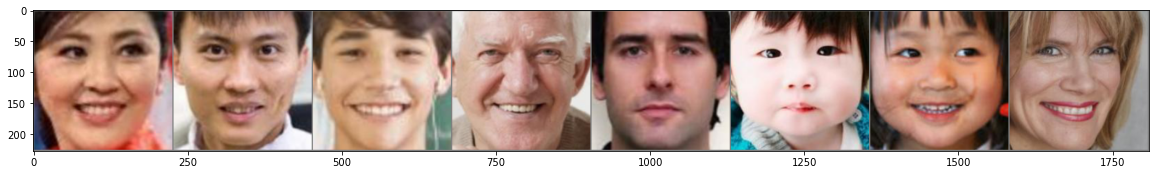

 36.0  29.0  15.0  78.0  33.0   3.0   4.0  63.0


In [52]:
# display some images

import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(20,12))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
    
# get some random training images
dataiter = iter(trainloader)
data_dicts = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(data_dicts["image"]))

# print labels
print('Age : ', ' '.join('%5s' % str(data_dicts["age"][j].item()) for j in range(8)))
print('Gender : ', ' '.join('%5s' % str(data_dicts["gender"][j].item()) for j in range(8)))
print('Race : ',' '.join('%5s' % str(data_dicts["race"][j].item()) for j in range(8)))

In [54]:
# ResNet18 pretrained network 받아서 씀
class Net(nn.Module):
    def __init__(self, use_pretrained=True):
        super(Net, self).__init__()
        ##implement this
        # [3, 224, 224]
        
        
    def forward(self, x):
        ##implement this


In [69]:
net = models.vgg16()
print(net.classifier[6])

Linear(in_features=4096, out_features=1000, bias=True)


In [55]:
#implement criterion
criterion = nn.MSELoss()

model = Net(use_pretrained=True)
summary(model, batch_size=-1, input_size=(3, 224, 224), device='cpu')
model = model.to(device)

optimizer = optim.Adam(model.parameters(), lr=0.0001)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [56]:
def train(epoch):
    model.train()
    total_loss = 0.
    for batch_idx, data_dict in enumerate(trainloader):
        target = data_dict["age"].type(torch.float).view(-1, 1)
#         target = target.type(torch.float).view(-1,1)
        data = data_dict["image"].to(device)
        target = target.to(device)
#         data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        total_loss += loss.item()
        optimizer.step()
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(trainloader.dataset),
                100. * batch_idx / len(trainloader), total_loss/(batch_idx+1)))

def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data_dict in testloader:
        target = data_dict["age"].type(torch.float).view(-1,1)
        data, target = data_dict["image"].to(device), target.to(device)
        output = model(data)
        test_loss += criterion(output, target).item() # sum up batch loss
        

    test_loss /= len(testloader.dataset)
    print('\nTest set: Average loss: {:.4f}'.format(
        test_loss, correct, len(testloader.dataset)))

In [57]:
for epoch in range(5):
    train(epoch)
    test()

My collate fucntion is working!!!!
Train Epoch: 0 [0/8802 (0%)]	Loss: 990.558472
My collate fucntion is working!!!!
My collate fucntion is working!!!!
My collate fucntion is working!!!!
My collate fucntion is working!!!!
My collate fucntion is working!!!!
My collate fucntion is working!!!!
My collate fucntion is working!!!!
My collate fucntion is working!!!!
My collate fucntion is working!!!!
My collate fucntion is working!!!!
Train Epoch: 0 [80/8802 (1%)]	Loss: 1510.783281
My collate fucntion is working!!!!
My collate fucntion is working!!!!
My collate fucntion is working!!!!
My collate fucntion is working!!!!
My collate fucntion is working!!!!
My collate fucntion is working!!!!
My collate fucntion is working!!!!
My collate fucntion is working!!!!
My collate fucntion is working!!!!
My collate fucntion is working!!!!
Train Epoch: 0 [160/8802 (2%)]	Loss: 1495.950434
My collate fucntion is working!!!!
My collate fucntion is working!!!!
My collate fucntion is working!!!!
My collate fucnti

ValueError: could not convert string to float: '20170109150557335.jpg.chip.jpg'

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()
#print images
imshow(torchvision.utils.make_grid(images))
print('GrondTruth: ', ' '.join('%5s' % labels[j].item() for j in range(8)))

In [ ]:
images = images.to(device)
outputs = model(images)

outputs = outputs.squeeze()

print('Predicted: ', ' '.join('%.1f' % outputs[j].item() for j in range(8))) 

<IPython.core.display.Javascript object>